Ipython3 Notebook for experiment nr. 212
================

This Notebook was created using the Jupyter Notebook. Be aware that you might want to switch to that.
it is assumend, that this notebook is in the same directory as the module for this experiment.

change the filenames and paths according to your set up

In [1]:
## using inline plots
%matplotlib inline

## importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
#import pylab as py
import ap21_module as main
import uncertainties as unc
import uncertainties.unumpy as unp
from scipy.optimize import curve_fit
#from scipy.stats import chi2

1)
===

In [2]:
### data

s = unc.ufloat(300, 2) #Teilchenweg [mm]
R = 75/2 # Radius des Fallrohrs [mm]

# fallzeiten
t_4c5mm = np.mean(unp.uarray([9.28, 9.34, 9.18, 9.21, 9.39], 0.3)) # Fallzeiten der Kugel mit radius 4.5mm
t_4mm = np.mean(unp.uarray([11.86, 11.96, 11.92, 11.82, 11.75], 0.2)) # " radius 4mm
t_3c5mm = np.mean(unp.uarray([13.06, 13.01, 12.90, 13.14, 13.07], 0.1)) # " radius 3.572mm
t_3mm = np.mean(unp.uarray([17.42, 17.24, 17.19, 17.59, 17.17], 0.1))
t_2c5mm = np.mean(unp.uarray([23.46, 23.48, 23.73, 23.76, 23.86], 0.05))
t_2mm = np.mean(unp.uarray([35.43, 36.26, 37.18, 35.96, 36.67], 0.5))
t_1c5mm = np.mean(unp.uarray([60.80, 60.20, 57.24, 61.07, 61.32], 0.5))
t_1mm = np.mean(unp.uarray([120.64, 120.18, 119.51, 121.01, 115.17], 1))
t_0c75mm = np.mean(unp.uarray([198.17, 183.93, 190.32, 190.90, 193.61], 2))
t = np.array([t_4c5mm, t_4mm, t_3c5mm, t_3mm, t_2c5mm, t_2mm, t_1c5mm, t_1mm, t_0c75mm]) # mittlere gesamtzeiten

# radien
r = np.array([4.5, 4, 3.572, 3, 2.5, 2, 1.5, 1, 0.75]) 
r = unp.uarray(r, r*0.01) # 1% Fehler 

# dichten in g/cm^3
rho_k = unp.uarray([1.3625, 1.3575, 1.3775, 1.3775, 1.3775, 1.3775, 1.3775, 1.3775, 1.3925], 0.0025) *1e-3 # Umrechnung auf g/mm^3
rho_f = unc.ufloat(1.146, 0.0005) *1e-3 #siehe diagramm in skript (bei 23.5grad C ) [g/mm^3]

k: [ 9320.35809221] [ 87.05026128]

dynamische Viskosität:  0.2339+/-0.0022  [Pas]


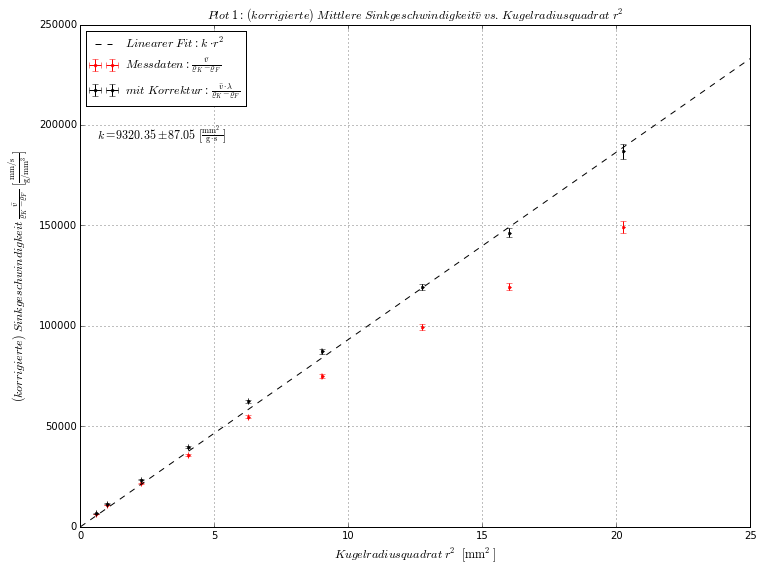

In [31]:
### mittlere Fallgeschwindigkeit
v = s/t

### ladenburg'sche Korrektur
lamb = 1 + 2.1*r/R

### values for plotting
x = unp.nominal_values(r)**2
x_err = unp.std_devs(r)**2
y = unp.nominal_values(v/(rho_k-rho_f))
y_err = unp.std_devs(v/(rho_k-rho_f))

### corrected values for plotting
y_corr = unp.nominal_values(v*lamb/(rho_k-rho_f))
y_err_corr = unp.std_devs(v*lamb/(rho_k-rho_f))

### linearer Fit
def lin_reg(x,k):
    return k*x

popt, pcov = curve_fit(lin_reg, x, y_corr, p0=[9000])
popt_err = np.sqrt(np.diag(pcov))
print('k:', popt, popt_err)
# parameter-string
par_str = r'$k=9320.35\pm87.05\ \mathrm{[\frac{mm^2}{g \cdot s}]}$'

### dynamic viscosity eta
k = unc.ufloat(popt[0], popt_err[0]) # steigung
eta = 2*9.81e3/(9*k)
print('\ndynamische Viskosität: ', eta, ' [Pas]')

### plotting
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.errorbar(x, y, yerr=y_err, xerr=x_err, fmt='r.', 
            label='$Messdaten:\ \\frac{\\bar{v}}{\\varrho_K - \\varrho_F}$')
ax.errorbar(x, y_corr, yerr=y_err_corr, xerr=x_err, fmt='k.', 
            label='$mit\ Korrektur:\ \\frac{\\bar{v}\cdot\\lambda}{\\varrho_K - \\varrho_F}$')
ax.plot(np.linspace(0,25), lin_reg(np.linspace(0,25), *popt), 'k--', 
        label='$Linearer\ Fit:\ k \cdot r^2$')
ax.text(0.6, 193000, par_str, fontsize=12)
ax.set_title('$Plot\ 1:\ (korrigierte)\ Mittlere\ Sinkgeschwindigkeit \\bar{v}\ vs.\ Kugelradiusquadrat\ r^2$',
             fontsize=12)
ax.set_xlabel('$Kugelradiusquadrat\ r^2\ \mathrm{[mm^2]}$', fontsize=12)
ax.set_ylabel('$(korrigierte)\ Sinkgeschwindigkeit\ \\frac{\\bar{v}}{\\varrho_K - \\varrho_F}\ \mathrm{[\\frac{mm/s}{g/mm^3}]}$',
              fontsize=12)
ax.grid()
ax.legend(fontsize=12, loc=0)


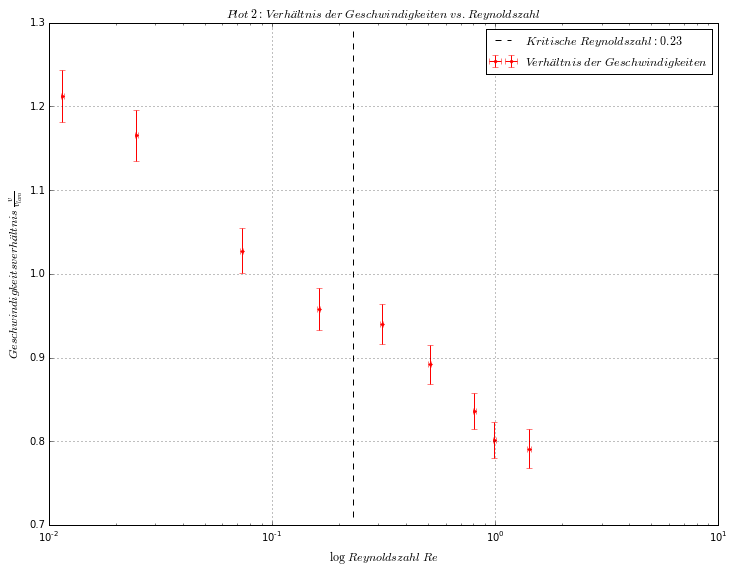

In [48]:
### v_lam
v_lam = 2/9 * 9.81e3 * (rho_k-rho_f)/eta * r**2

### Reynoldsnumber
Re = rho_f*v*2*r/eta

### plotting values
y = unp.nominal_values(v/v_lam)
y_err = unp.std_devs(v/v_lam)
x = unp.nominal_values(Re)
x_err = unp.std_devs(Re)

### plotting
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.errorbar(x, y, yerr=y_err, xerr=x_err, fmt='r.', label='$Verhältnis\ der\ Geschwindigkeiten$')
ax.vlines(0.23, 0.71, 1.29, linestyles='--', label='$Kritische\ Reynoldszahl:\ 0.23$')
ax.set_xscale('log')
ax.set_xlabel('$\\mathrm{log}\ Reynoldszahl\ Re$', fontsize=12)
ax.set_ylabel('$Geschwindigkeitsverhältnis\ \\frac{v}{v_{lam}}$', fontsize=12)
ax.set_title('$Plot\ 2:\ Verhältnis\ der\ Geschwindigkeiten\ vs.\ Reynoldszahl$', fontsize=12)
ax.grid()
ax.legend()

9320.358091755068+/-87.05026126801822